In [1]:
import numpy as np

import matplotlib.pyplot as plt

import pandas as pd
import seaborn as sns

from problems import IntegerKnapsack

from fastqaoa.optimize import optimize_interpolate
from fastqaoa import qaoa, Metrics

In [2]:
def dg(v, ik):
    if not hasattr(ik, "_penalty"):
        ik.quad_penalty_cost()
    max_penalty = max(ik.costs)
    penalty = ik._penalty + v * (max_penalty - ik._penalty)
    if v < 0:
        penalty = (1 + v) * ik._penalty
    return ik.quad_penalty_cost(penalty=penalty).scale_between_sym() * len(ik.weights)

In [12]:
pscale = [0, 1]

data = []

iks = IntegerKnapsack.get_instances()[8]

for ik in iks[:64]:
    for p in pscale:
        cost = ik.masked_cost()
        _, g = ik.diagonalized()
        depths = [1, 2, 3, 4, 6, 8, 12, 16]
        mdg = dg(p, ik)
        res = optimize_interpolate(mdg, cost, depths=depths)
        
        sv = qaoa(mdg, res[depths[-1]].betas, res[depths[-1]].gammas)
        metr = Metrics.compute(sv, cost, g).dump()
    
        data.append({"pscale": p, "problem_id": ik.id, **metr})

df = pd.DataFrame(data)

<Axes: xlabel='pscale', ylabel='p_opt'>

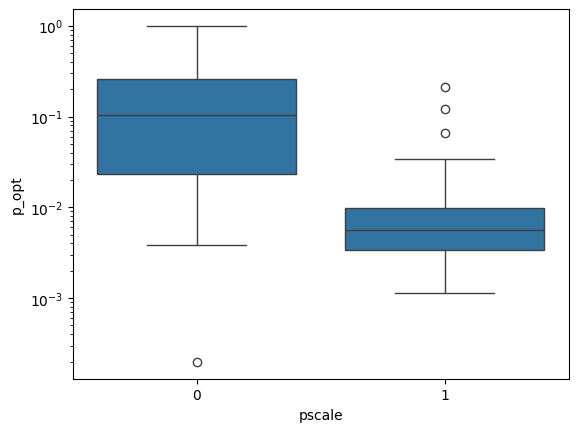

In [13]:
sns.boxplot(df, x="pscale", y="p_opt", log_scale=True)#, estimator="median", errorbar=("pi", 50), marker="o", err_style="bars")
# plt.yscale("log")

In [ ]:
dg(-4, iks[1]).min_val